In [1]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_pickle('all_banks')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
tickers = 'BAC C JPM MS WFC'.split()

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [4]:
df.xs(key='C',axis=1,level='Bank Ticker')
#learning cross-section xs

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.00,493.80,481.10,492.90,1537660
2006-01-04,488.60,491.00,483.50,483.80,1871020
2006-01-05,484.40,487.80,484.00,486.20,1143160
2006-01-06,488.80,489.00,482.00,486.20,1370250
2006-01-09,486.00,487.40,483.00,483.90,1680740
...,...,...,...,...,...
2015-12-24,52.48,52.97,52.45,52.71,4671254
2015-12-28,52.57,52.57,51.96,52.38,8761743
2015-12-29,52.76,53.22,52.74,52.98,10155134


# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [5]:
df.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()

In [7]:
for tick in tickers:
    returns[tick + ' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,JPM Return,MS Return,WFC Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.016242,0.010586,0.000000


** Create a pair plot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

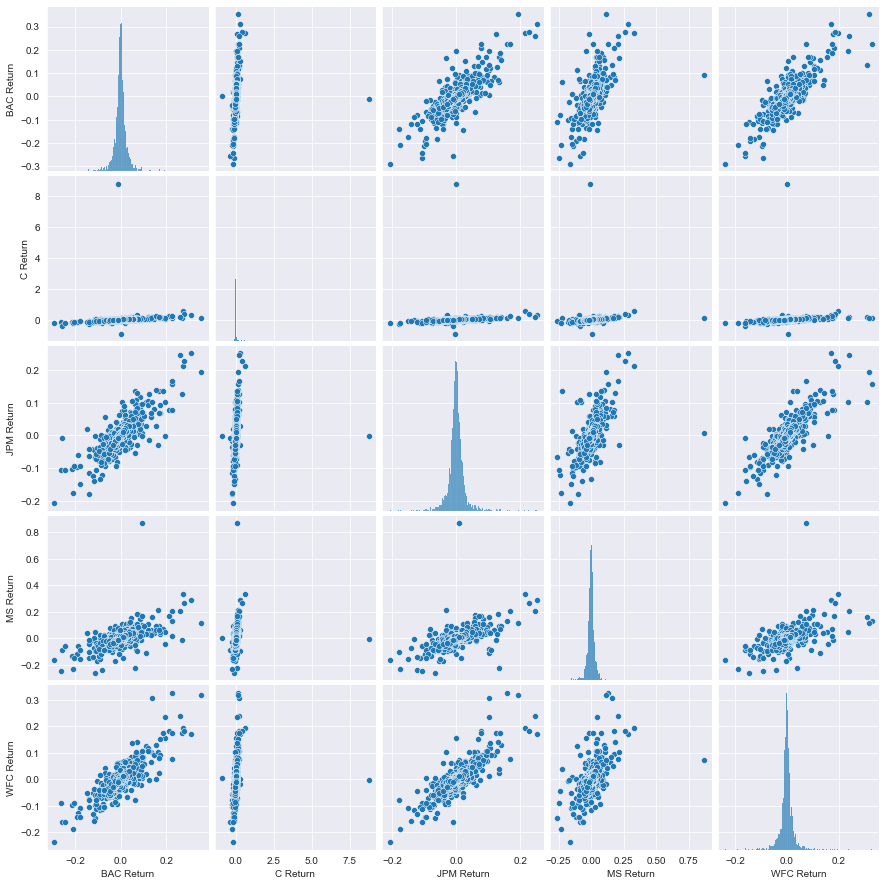

In [8]:
sns.pairplot(data=returns[1:], diag_kind='hist')

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [9]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [10]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame? **

Answer: Reverse stock split

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [11]:
returns.std()

BAC Return    0.036650
C Return      0.179969
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

CitiGroup is riskiest for the whole duration

In [12]:
returns[dt(2015, 1, 1):dt(2015, 12, 31)].std()
#Morgan stanley is riskiest for 2015the whole duration: the bigger the std, the higher the risk

BAC Return    0.016163
C Return      0.015289
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a dist plot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

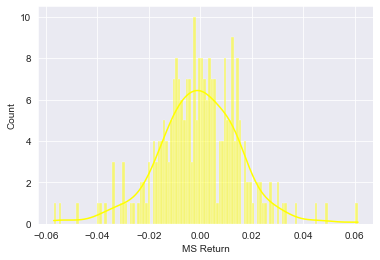

In [13]:
sns.histplot(returns['MS Return'][dt(2015, 1, 1):dt(2015, 12, 31)], bins=120, color='yellow', alpha=0.5, kde=True)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return', ylabel='Count'>

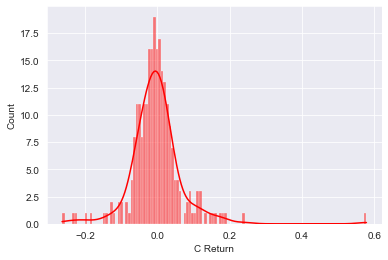

In [14]:
sns.histplot(returns['C Return'][dt(2008, 1, 1):dt(2008, 12, 31)], bins=120, color='red', alpha=0.5, kde=True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
from chart_studio import plotly
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross-section of the data.)**

In [ ]:
df.xs(key='Close', axis=1, level=1).plot()

In [ ]:
df.xs(key='Close', axis=1, level=1).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [ ]:
df['BAC']['Close'][dt(2008, 1, 1):dt(2008, 12, 31)].plot()
df['BAC']['Close'][dt(2008, 1, 1):dt(2008, 12, 31)].rolling(window=30).mean().plot()

In [ ]:
df['BAC']['Close'][dt(2008, 1, 1):dt(2008, 12, 31)].iplot()
df['BAC']['Close'][dt(2008, 1, 1):dt(2008, 12, 31)].rolling(window=30).mean().iplot()

** Create a heatmap of the correlation between the stocks Close Price.**

In [ ]:
sns.heatmap(data=df.xs(key='Close', axis=1, level=1).corr(), annot=True)

** Optional: Use seaborn's cluster map to cluster the correlations together:**

In [ ]:
sns.clustermap(data=df.xs(key='Close', axis=1, level=1).corr(), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
df['BAC'][dt(2015, 1, 1):dt(2016, 1, 1)][['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
df['MS'][dt(2015, 1, 1):dt(2015, 12, 31)]['Close'].ta_plot(study='sma', period=[10])

In [ ]:
df['MS'][dt(2015, 1, 1):dt(2015, 12, 31)]['Close'].ta_plot(study='sma', period=[50,200])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
df['BAC'][dt(2015, 1, 1):dt(2015, 12, 31)]['Close'].ta_plot(study='boll')

In [ ]:
df['BAC'][dt(2015, 1, 1):dt(2015, 12, 31)]['Close'].ta_plot(study='boll', period=10)

In [ ]:
df['BAC'][dt(2015, 1, 1):dt(2015, 12, 31)]['Close'].ta_plot(study='boll', period=10, boll_std=2)